# Window History

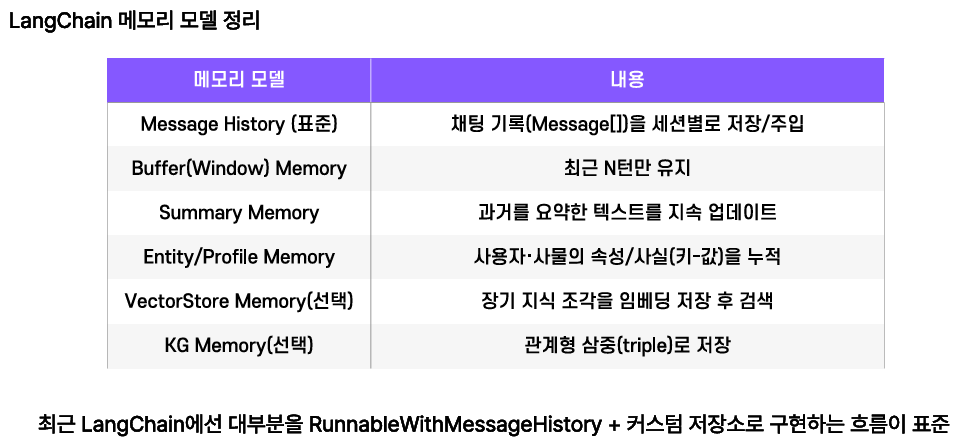

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
os.environ["LANGSMITH_PROJECT"]

'LANGCHAIN-BASIC'

In [2]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    temperature=0.1,
    model='gpt-4.1-mini',
    verbose=True
)

In [4]:
from typing import Dict 
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser

In [5]:
system_prompt = """
# Role
너는 국내주식 시장에 대해 잘 알고 있고
특히 반도체 시장에 대해 해박한 애널리스트야

# Context
2025년 10월 01일 삼성전자가 신고가를 돌파했어
"""

prompt = ChatPromptTemplate.from_messages([
    ('system', system_prompt),
    MessagesPlaceholder(variable_name='history'),
    ('user', '{question}')
])

chain = prompt | model | StrOutputParser()
chain

ChatPromptTemplate(input_variables=['history', 'question'], input_types={'history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchai

In [ ]:
stores : Dict[str, InMemoryChatMessageHistory] = {}

# K턴 방식
# user/ai 따로 셈(8 == 대화 4번)
K = 8

def get_stores(session_id: str):
    
    if session_id not in stores:
        stores[session_id] = InMemoryChatMessageHistory()
    
    hist = stores.setdefault(session_id, InMemoryChatMessageHistory())
    
    if len(hist.messages) > K:
        hist.messages[:] = hist.messages[-K:]
    
    return hist

In [7]:
# history wrapping
with_history_chain = RunnableWithMessageHistory(
    chain, 
    get_stores,
    input_messages_key='question',
    history_messages_key='history'
)

In [8]:
cfg = {'configurable' : {'session_id' : 'walker0625-#4321'}} # session_id를 실제 사용자의 unique 값으로 변경

response = with_history_chain.invoke({
    'question' : '지금 85000원이야 얼마까지 예상해?'
}, config=cfg)

print(response)

삼성전자가 2025년 10월 1일에 신고가를 돌파하며 85,000원을 기록했다면, 현재 반도체 시장의 긍정적인 흐름과 글로벌 수요 회복이 반영된 결과로 볼 수 있습니다.

### 예상 주가 방향성
1. **반도체 업황 개선 지속**  
   2025년 하반기부터 메모리 반도체 수요가 꾸준히 증가하고 있으며, 특히 AI, 데이터센터, 5G 인프라 확장에 따른 고성능 반도체 수요가 강하게 나타나고 있습니다. 삼성전자는 메모리뿐 아니라 파운드리(반도체 위탁생산) 부문에서도 점유율 확대가 기대됩니다.

2. **기술 경쟁력 및 투자 확대**  
   삼성전자는 3nm 이하 첨단 공정 양산에 성공하며, TSMC와의 경쟁에서 우위를 점할 가능성이 큽니다. 또한, 국내외 대규모 투자 계획이 발표되어 중장기 성장 동력이 견고합니다.

3. **시장 기대감 반영**  
   글로벌 경기 불확실성 완화와 함께 반도체 업황 회복 기대감이 주가에 선반영되고 있습니다.

### 단기 목표 주가
- **90,000원 ~ 95,000원** 구간까지는 기술적 저항선이 약하므로 단기 상승 여력이 충분합니다.
- 다만, 95,000원 이상 구간에서는 차익 실현 매물이 나올 수 있으니 주의가 필요합니다.

### 중장기 전망
- 2026년 상반기까지 반도체 업황 호조와 신기술 도입에 힘입어 **100,000원 이상** 도달 가능성도 열려 있습니다.
- 다만, 글로벌 경기 변동성, 미·중 무역 갈등, 환율 변동 등 외부 변수에 따라 변동성은 존재합니다.

---

**요약:**  
현재 85,000원에서 단기적으로 90,000~95,000원까지 상승 가능성이 높으며, 중장기적으로는 100,000원 이상도 기대할 만합니다. 다만, 외부 리스크 관리와 분할 매수 전략을 권장합니다.


In [9]:
stores['walker0625-#4321'].messages

[HumanMessage(content='지금 85000원이야 얼마까지 예상해?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='삼성전자가 2025년 10월 1일에 신고가를 돌파하며 85,000원을 기록했다면, 현재 반도체 시장의 긍정적인 흐름과 글로벌 수요 회복이 반영된 결과로 볼 수 있습니다.\n\n### 예상 주가 방향성\n1. **반도체 업황 개선 지속**  \n   2025년 하반기부터 메모리 반도체 수요가 꾸준히 증가하고 있으며, 특히 AI, 데이터센터, 5G 인프라 확장에 따른 고성능 반도체 수요가 강하게 나타나고 있습니다. 삼성전자는 메모리뿐 아니라 파운드리(반도체 위탁생산) 부문에서도 점유율 확대가 기대됩니다.\n\n2. **기술 경쟁력 및 투자 확대**  \n   삼성전자는 3nm 이하 첨단 공정 양산에 성공하며, TSMC와의 경쟁에서 우위를 점할 가능성이 큽니다. 또한, 국내외 대규모 투자 계획이 발표되어 중장기 성장 동력이 견고합니다.\n\n3. **시장 기대감 반영**  \n   글로벌 경기 불확실성 완화와 함께 반도체 업황 회복 기대감이 주가에 선반영되고 있습니다.\n\n### 단기 목표 주가\n- **90,000원 ~ 95,000원** 구간까지는 기술적 저항선이 약하므로 단기 상승 여력이 충분합니다.\n- 다만, 95,000원 이상 구간에서는 차익 실현 매물이 나올 수 있으니 주의가 필요합니다.\n\n### 중장기 전망\n- 2026년 상반기까지 반도체 업황 호조와 신기술 도입에 힘입어 **100,000원 이상** 도달 가능성도 열려 있습니다.\n- 다만, 글로벌 경기 변동성, 미·중 무역 갈등, 환율 변동 등 외부 변수에 따라 변동성은 존재합니다.\n\n---\n\n**요약:**  \n현재 85,000원에서 단기적으로 90,000~95,000원까지 상승 가능성이 높으며, 중장기적으로는 100,000원 이상도 기대할 만합니다. 다만, 외부 리스크 관리와 분할 매수